In [31]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
mpl.style.use('classic')

import baraffe_tables
from baraffe_tables.table_search import baraffe_table_search

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

import mesa_helper as mh
import os
import shutil

%matplotlib inline

In [56]:
mJtomSun = u.jupiterMass.to(u.solMass)
mJtoGrams = u.jupiterMass.to(u.g)

rJtorSun = u.jupiterRad.to(u.solRad)
rJtoCm = u.jupiterRad.to(u.cm)


In [19]:
Minit = np.array((20.0, 14.0, 9.8, 6.9, 4.805, 3.4, 2.3, 1.6))#, 1.1, 0.82, 0.57, 0.4, 0.28, 0.2))
Rsuccess = np.array((5.0, 5.0, 5.0, 5.0, 2.0, 2.0, 2.0, 1.5))

In [58]:
print(Minit*mJtomSun)

[0.01909188 0.01336432 0.00935502 0.0065867  0.00458683 0.00324562
 0.00219557 0.00152735]


In [55]:
# search baraffe tables for 0.01 Msun object
mp_arr = np.array((0.01)) #msun
mp_arr = np.atleast_1d(mp_arr)
age_arr = 10**np.linspace(6.,10.,25)/1.e9
L_matrix = np.zeros((len(mp_arr),len(age_arr)))
Teff_matrix = np.zeros((len(mp_arr),len(age_arr)))

for i, mp in enumerate(mp_arr):
    for j, age in enumerate(age_arr):
        row = baraffe_table_search(column="M/Ms", value=mp, age=age, model="2003", age_interp=True)
        print(row)
        L_matrix[i,j] = row['L/Ls']
        Teff_matrix[i,j] = row['Teff']
    

{'M/Ms': 0.01, 'Teff': 2251.0, 'L/Ls': -2.735, 'g': 3.529, 'R': 0.285, 'Mv': 16.85, 'Mr': 14.02, 'Mi': 11.7, 'Mj': 9.3, 'Mh': 8.93, 'Mk': 8.52, 'Mll': 7.78, 'Mm': 8.09}
Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0014677992676220707 Gyr
{'M/Ms': 0.01, 'Teff': 2217.552, 'L/Ls': -2.808, 'g': 3.575, 'R': 0.273, 'Mv': 17.107, 'Mr': 14.236, 'Mi': 11.923, 'Mj': 9.475, 'Mh': 9.107, 'Mk': 8.693, 'Mll': 7.93, 'Mm': 8.263}
Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0021544346900318825 Gyr
{'M/Ms': 0.01, 'Teff': 2168.458, 'L/Ls': -2.916, 'g': 3.642, 'R': 0.255, 'Mv': 17.485, 'Mr': 14.554, 'Mi': 12.251, 'Mj': 9.733, 'Mh': 9.366, 'Mk': 8.947, 'Mll': 8.149, 'Mm': 8.517}
Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0031622776601683794 Gyr
{'M/Ms': 0.01, 'Teff': 2096.397, 'L/Ls': -3.074, 'g': 3.741, 'R': 0.229, 'Mv': 18.039, 'Mr': 15.02, 'Mi': 12.732, 'Mj': 10.111, 'Mh': 9.746, 'Mk': 9.32, 'Mll': 8.472, 'Mm': 8.89}
Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0046415888336127815

Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0031750920956305677 Gyr
Interpolating tables 0.010 Gyr and 0.050 Gyr to 0.014521142085273067 Gyr
Interpolating tables 0.050 Gyr and 0.100 Gyr to 0.051164563292419335 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.12651356353972726 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.22999731992819758 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.47757848683152115 Gyr
Interpolating tables 1.000 Gyr and 5.000 Gyr to 1.1060767618534761 Gyr
Interpolating tables 1.000 Gyr and 5.000 Gyr to 2.699066638122148 Gyr
Interpolating tables 5.000 Gyr and 10.000 Gyr to 6.77935615951346 Gyr
[4.87770986e-03 4.87770986e-03 2.93000082e-03 1.31957498e-03
 2.28744346e-04 5.32383453e-05 2.98319626e-05 7.45289528e-06
 2.53549199e-06 1.13421322e-06 2.65270078e-07 1.56431018e-07]
[2468.74366261 2468.74366261 2441.07151509 2340.71481782 1899.1452434
 1440.95279109 1293.7456126   941.55930951  733.47423149  621.41644015
  430.63639717  378.28423922

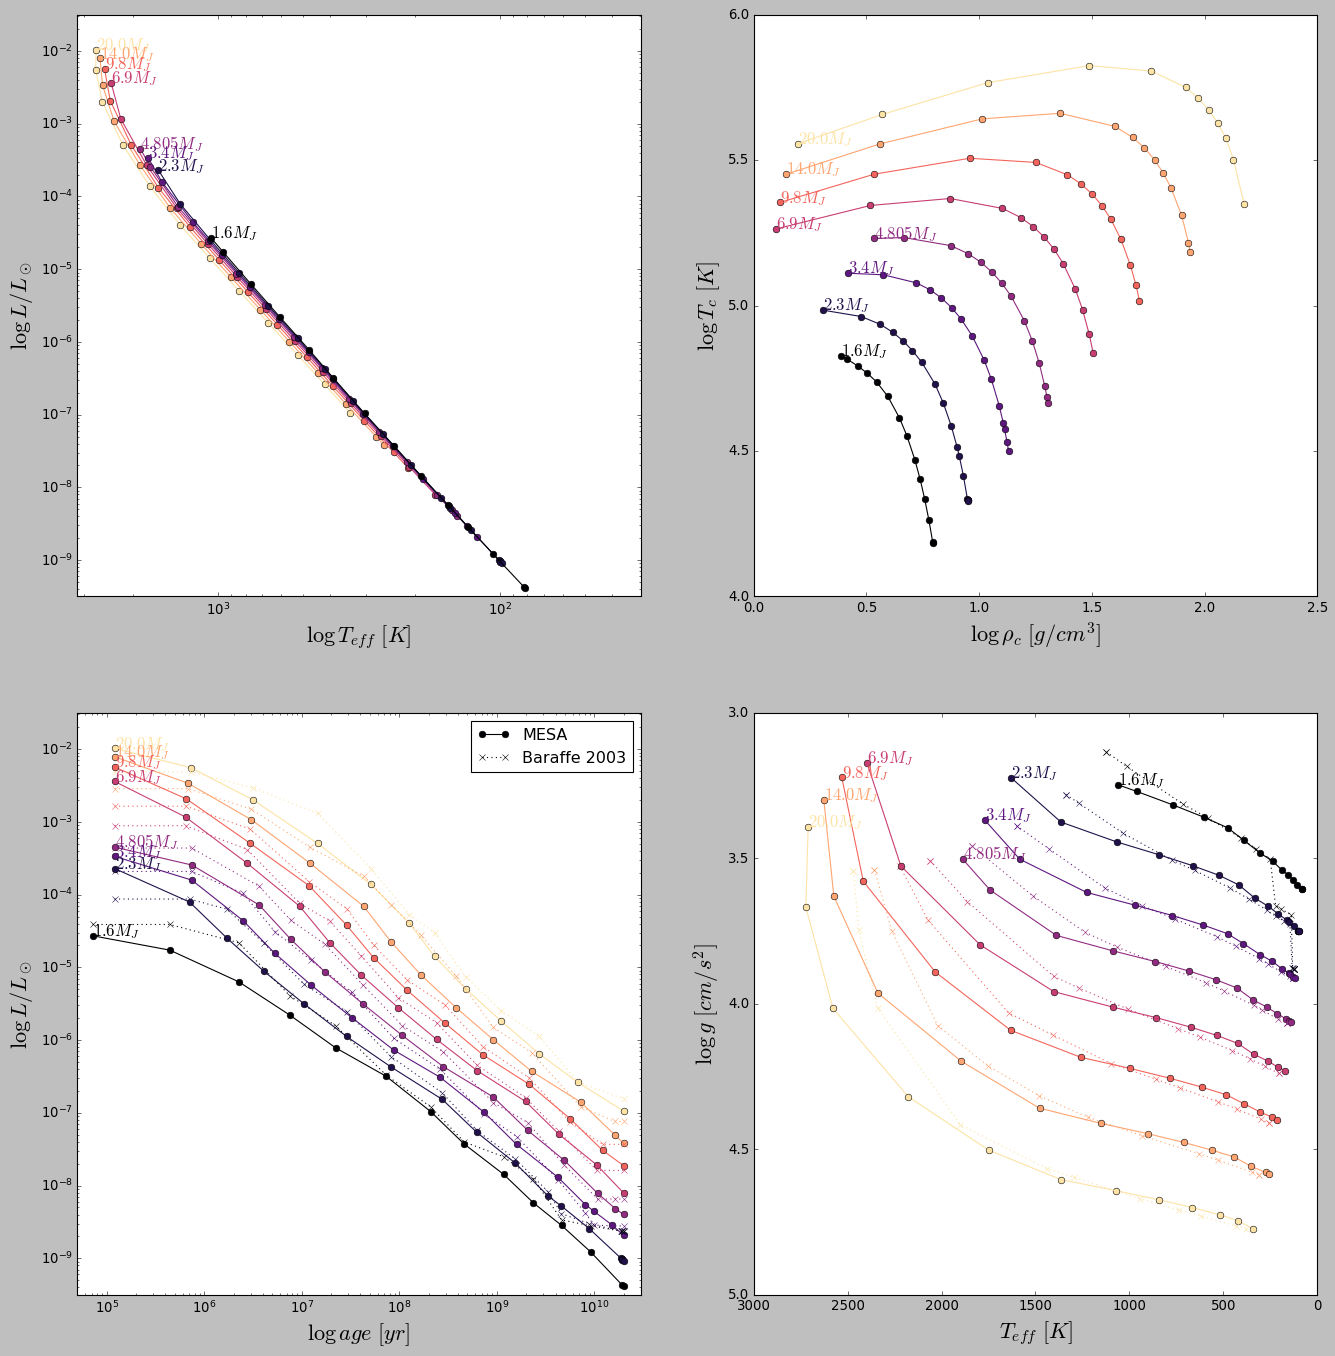

In [85]:
fig, axes = plt.subplots(2,2, figsize=(20,20))
axes[0,0].set_xlabel(r"$\log{T_{eff}}\ [K]$")
axes[0,0].set_xlim(10**3.5, 10**1.5)
axes[0,0].set_ylabel(r"$\log{L/L_\odot}$")
axes[0,0].set_ylim(10**-9.5,10**-1.5)
axes[0,0].set_xscale("log")
axes[0,0].set_yscale("log")

axes[0,1].set_xlabel(r"$\log{\rho_c}\ [g/cm^3]$")
axes[0,1].set_ylabel(r"$\log{T_c}\ [K]$")

axes[1,0].set_xlabel(r"$\log{age}\ [yr]$")
axes[1,0].set_xlim(5.e4,3.e10)
axes[1,0].set_ylabel(r"$\log{L/L_\odot}$")
axes[1,0].set_ylim(10**-9.5,10**-1.5)
axes[1,0].set_xscale("log")
axes[1,0].set_yscale("log")

axes[1,1].set_xlabel(r"$T_{eff}\ [K]$")
axes[1,1].set_xlim(3000,0)
axes[1,1].set_ylabel(r"$\log{g}\ [cm/s^2]$")
axes[1,1].set_ylim(5,3.0)

for ax in np.ravel(axes):
    ax.xaxis.get_label().set_fontsize(20)
    ax.yaxis.get_label().set_fontsize(20)

cm = plt.get_cmap('magma') 
cNorm  = colors.Normalize(vmin=np.log(np.min(Minit)), vmax=np.log(np.max(Minit))+0.15)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

for m in Minit:
    colorVal = scalarMap.to_rgba(np.log(m))
    
    history = Table.read("./Minit={0}Mj/LOGS/history.data".format(m), format="ascii", header_start=4, data_start=5)
    mask = (history['star_age'] > 5.e4)
    history = history[mask]

    ages = np.array(history['star_age'])
    baraffe_Ls = np.zeros_like(ages)
    baraffe_Teffs = np.zeros_like(ages)
    baraffe_loggs = np.zeros_like(ages)
    for i,age in enumerate(ages):
        row = baraffe_table_search(column="M/Ms", value=m*mJtomSun, age=age/1.e9, model="2003", age_interp=True)
        baraffe_Ls[i] = 10**row['L/Ls']
        baraffe_Teffs[i] = row['Teff']
        baraffe_loggs[i] = row['g']

    print(baraffe_Ls)
    print(baraffe_Teffs)
        
    axes[0,0].plot(history['Teff'], history['luminosity'], color=colorVal,marker='o')
    axes[0,1].plot(history['log_cntr_Rho'], history['log_cntr_T'], color=colorVal,marker='o')
    axes[1,0].plot(history['star_age'], history['luminosity'], color=colorVal,marker='o')
    axes[1,1].plot(history['Teff'], history['log_g'],color=colorVal, marker='o')

    axes[0,0].text(history['Teff'][0], history['luminosity'][0], s=r"${0} M_J$".format(m),color=colorVal,fontsize=15)
    axes[0,1].text(history['log_cntr_Rho'][0], history['log_cntr_T'][0], s=r"${0} M_J$".format(m),color=colorVal,fontsize=15)
    axes[1,0].text(history['star_age'][0], history['luminosity'][0], s=r"${0} M_J$".format(m),color=colorVal,fontsize=15)
    axes[1,1].text(history['Teff'][0], history['log_g'][0], s=r"${0} M_J$".format(m),color=colorVal,fontsize=15)

    axes[1,0].plot(ages, baraffe_Ls, color=colorVal, ls=":",lw=1,marker='x')
    axes[1,1].plot(baraffe_Teffs, baraffe_loggs, color=colorVal, ls=":",lw=1,marker='x')


axes[1,0].plot(np.arange(3), np.arange(3), ls="-",marker='o', color=colorVal,label="MESA")
axes[1,0].plot(np.arange(3), np.arange(3), ls=":",marker='x',color=colorVal, label="Baraffe 2003")
axes[1,0].legend(loc="best")
#plt.show()
plt.savefig("MESAr24.03.01_vs_baraffe2003.pdf",bbox_inches="tight")
    

In [12]:
# read in MESA results
history_2RJ = Table.read("./MESA_make_planets_0.01Msun/LOGS/history.data", format="ascii", header_start=4, data_start=5)
print(history.colnames)

['model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'mass_conv_core', 'Teff', 'log_L', 'log_R', 'log_g', 'log_cntr_P', 'log_cntr_Rho', 'log_cntr_T', 'total_mass_h1', 'total_mass_he3', 'total_mass_he4', 'total_mass_c12', 'total_mass_n14', 'total_mass_o16', 'total_mass_ne20', 'total_mass_mg24', 'num_retries', 'num_iters', 'elapsed_time']


In [13]:
# read in MESA results
history_3RJ = Table.read("./MESA_make_planets_0.01Msun/LOGS/history.data", format="ascii", header_start=4, data_start=5)
print(history.colnames)

['model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'mass_conv_core', 'Teff', 'log_L', 'log_R', 'log_g', 'log_cntr_P', 'log_cntr_Rho', 'log_cntr_T', 'total_mass_h1', 'total_mass_he3', 'total_mass_he4', 'total_mass_c12', 'total_mass_n14', 'total_mass_o16', 'total_mass_ne20', 'total_mass_mg24', 'num_retries', 'num_iters', 'elapsed_time']


In [14]:
# search baraffe tables for 0.01 Msun object
mp_arr = np.array((0.01)) #msun
mp_arr = np.atleast_1d(mp_arr)
age_arr = 10**np.linspace(6.,10.,25)/1.e9
L_matrix = np.zeros((len(mp_arr),len(age_arr)))
Teff_matrix = np.zeros((len(mp_arr),len(age_arr)))

for i, mp in enumerate(mp_arr):
    for j, age in enumerate(age_arr):
        row = baraffe_table_search(column="M/Ms", value=mp, age=age, model="2003", age_interp=True)
        #sprint(row)
        L_matrix[i,j] = row['L/Ls']
        Teff_matrix[i,j] = row['Teff']
    

Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0014677992676220707 Gyr
Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0021544346900318825 Gyr
Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0031622776601683794 Gyr
Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0046415888336127815 Gyr
Interpolating tables 0.005 Gyr and 0.010 Gyr to 0.006812920690579608 Gyr
Interpolating tables 0.010 Gyr and 0.050 Gyr to 0.014677992676220676 Gyr
Interpolating tables 0.010 Gyr and 0.050 Gyr to 0.021544346900318825 Gyr
Interpolating tables 0.010 Gyr and 0.050 Gyr to 0.03162277660168379 Gyr
Interpolating tables 0.010 Gyr and 0.050 Gyr to 0.046415888336127725 Gyr
Interpolating tables 0.050 Gyr and 0.100 Gyr to 0.06812920690579607 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.14677992676220677 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.21544346900318778 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.31622776601683794 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.46

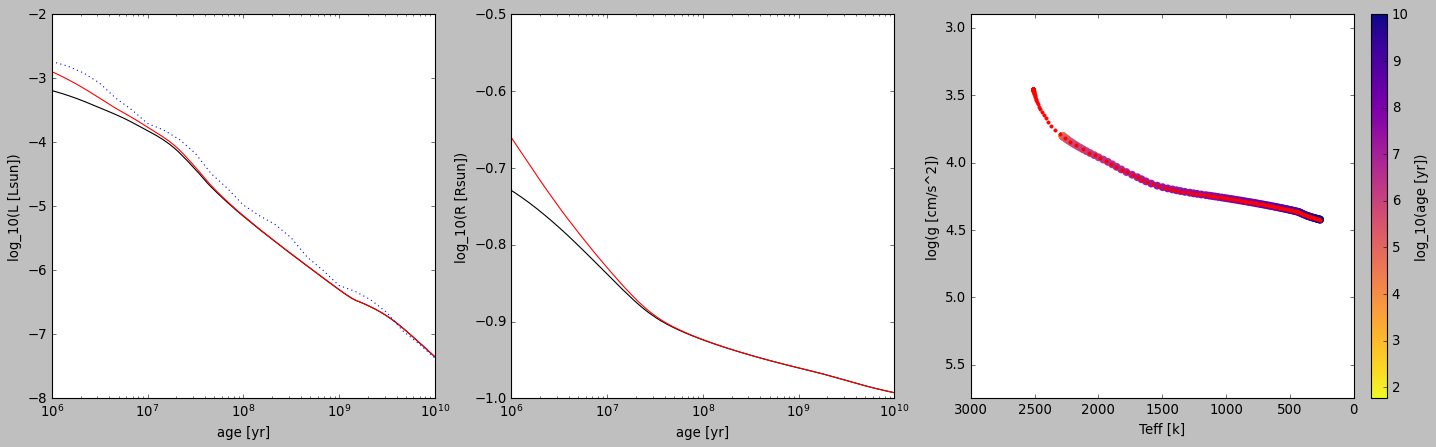

In [17]:
fig, axes = plt.subplots(1,3,figsize=(21,6))
axes[0].plot(history_2RJ['star_age'],history_2RJ['log_L'],'k-')

axes[0].plot(history_3RJ['star_age'],history_3RJ['log_L'],'r-')

for i, mp in enumerate(mp_arr):
    axes[0].plot(age_arr*1.e9, L_matrix[i], ':')
    
axes[0].set_xlabel("age [yr]")
axes[0].set_ylabel("log_10(L [Lsun])")
axes[0].set_xscale("log")
axes[0].set_xlim(1.e6,1.e10)



axes[1].plot(history_2RJ['star_age'],history_2RJ['log_R'],'k-')

axes[1].plot(history_3RJ['star_age'],history_3RJ['log_R'],'r-')

axes[1].set_xlabel("age [yr]")
axes[1].set_ylabel("log_10(R [Rsun])")
axes[1].set_xscale("log")
axes[1].set_xlim(1.e6,1.e10)

cs = axes[2].scatter(history_2RJ['Teff'],history_2RJ['log_g'],c=np.log10(history_2RJ['star_age']),marker='.',s=200,edgecolor='None',cmap='plasma_r')
axes[2].plot(history_3RJ['Teff'], history_3RJ['log_g'],'r.')
axes[2].set_xlabel("Teff [k]")
axes[2].set_ylabel("log(g [cm/s^2])")
axes[2].set_xlim(3000,0)
axes[2].set_ylim(5.75,2.9)

cax = plt.axes((0.91, 0.1, 0.01, 0.8))
plt.colorbar(cs,cax=cax,label="log_10(age [yr])")

plt.show()

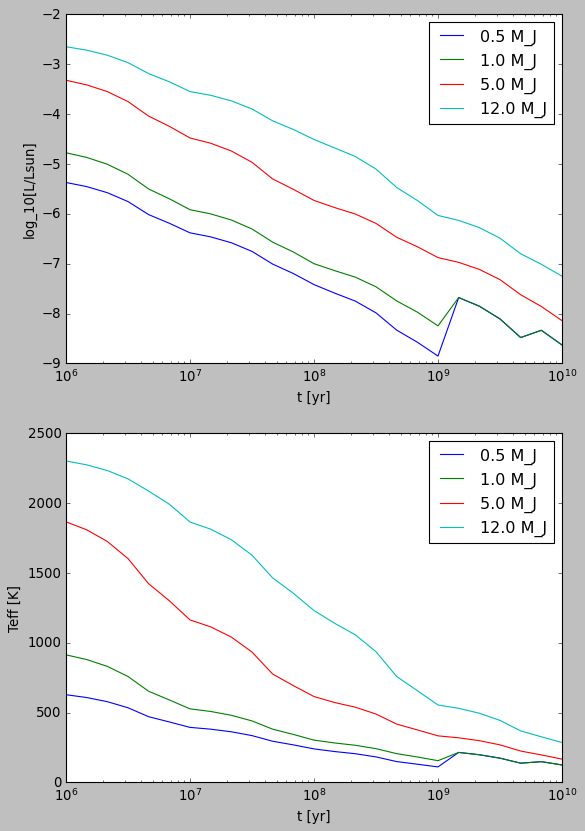

In [5]:
fig, axes = plt.subplots(2,1,figsize=(8,12))
for i, mp in enumerate(mp_arr):
    axes[0].plot(age_arr*1.e9, L_matrix[i], '-',label="{0} M_J".format(mp/0.0009545942339693249))
    axes[1].plot(age_arr*1.e9, Teff_matrix[i], '-',label="{0} M_J".format(mp/0.0009545942339693249))
axes[0].legend(loc="best")
axes[1].legend(loc="best")
axes[0].set_xscale("log")
axes[1].set_xscale("log")

axes[0].set_xlabel("t [yr]")
axes[1].set_xlabel("t [yr]")
axes[0].set_ylabel("log_10[L/Lsun]")
axes[1].set_ylabel("Teff [K]")

axes[0].set_xlim(1.e6,1.e10)
axes[1].set_xlim(1.e6,1.e10)

plt.show()